In [9]:
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import A2C
from stable_baselines.common.env_checker import check_env
from stable_baselines.common.evaluation import evaluate_policy

In [10]:
import gym
import w_mac
from collections import defaultdict
import matplotlib as plt
import networkx as nx
import dill

defaultdict(<class 'list'>, {0: [2, 1, 3], 1: [2, 3], 2: [3, 4], 3: [4], 5: [2, 3, 4]})


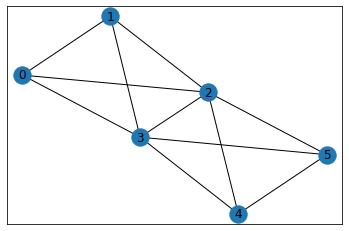

In [11]:

# data = [(0,2),(0,1),(1,2),(2,3),(2,4),(3,4)]
#data = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5),(4,8),(4,9),(5,6),(6,7),(5,7),(8,9),(6,9)]#,(6,8),(7,8),(8,9),(9,10)]
d = defaultdict(list)
data = [(0,2),(0,1),(0,3),(1,2),(1,3),(2,3),(2,4),(3,4),(5,2),(5,3),(5,4)]
for node, dest in data:
    d[node].append(dest)
print(d)

G = nx.Graph()
for k,v in d.items():
    for vv in v:
        G.add_edge(k,vv)
nx.draw_networkx(G)

self.collision_domain {5: [0, 1, 2, 3], 8: [2, 3, 4, 5]}
self.node_in_domains :  {0: [5], 1: [5], 2: [5, 8], 3: [5, 8], 4: [8], 5: [8]}
self.attack_nodes [2]
self.node_action_list {0: [0, 1, 2, 3], 2: [0, 1, 2, 3, 4, 5], 1: [0, 1, 2, 3], 3: [0, 1, 2, 3, 4, 5], 4: [2, 3, 4, 5], 5: [2, 3, 4, 5]}
sorted self.node_action_list {0: [0, 1, 2, 3], 2: [0, 1, 2, 3, 4, 5], 1: [0, 1, 2, 3], 3: [0, 1, 2, 3, 4, 5], 4: [2, 3, 4, 5], 5: [2, 3, 4, 5]}
action_space MultiDiscrete([4 6 4 6 4 4])
MultiDiscrete([7 7 7 7 7 7 6])
[4 5 6 5 6 3 0]
------------------ resetting environment--------------------
self.attack_nodes [5]
[1, 1, 3, 0, 2, 6, 5]


array([1, 1, 3, 0, 2, 6, 5])

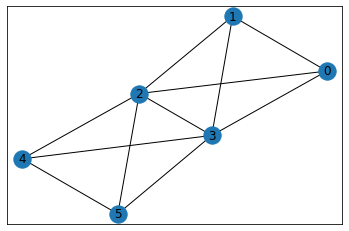

In [12]:
env = gym.make('wmac-graph-v0',graph=G)
#env = gym.make('wmac-tune-v0')
env.reset()

In [5]:
check_env(env)

------------------ resetting environment--------------------
self.attack_nodes [1]
[4, 5, 6, 5, 5, 4, 1]
Packet lost due to passing to defect node 2 index 1 [3, 1, 6, 2, 2, 3] [1, 1, 0, 1, 1, 1]
Packet lost due to passing to defect node 0 index 0 [1, 4, 6, 5, 6, 3] [1, 1, 0, 1, 0, 1]
Packet lost due to passing to defect node 0 index 0 [1, 0, 6, 0, 5, 4] [1, 1, 0, 1, 1, 1]
packets delivered  0
packet_lost  25
------------------ resetting environment--------------------
self.attack_nodes [5]
[3, 3, 2, 2, 2, 6, 5]
Packet lost due to passing to defect node 3 index 3 [2, 1, 6, 5, 2, 6] [1, 1, 0, 1, 1, 0]


In [6]:
assert(dill.pickles(env))

In [7]:
dill.pickles(env)

True

In [ ]:
episode_rewards, episode_lengths = evaluate_policy(self.model, 
                                                   self.eval_env,
                                                   n_eval_episodes=self.n_eval_episodes,
                                                   render=False,
                                                   deterministic=self.deterministic,
                                                   return_episode_rewards=True)

In [ ]:
from ray import tune
from ray.tune.suggest.ax import AxSearch

parameters = [
    {"name": "x1", "type": "range", "bounds": [0.0, 1.0]},
    {"name": "x2", "type": "range", "bounds": [0.0, 1.0]},
]

def easy_objective(config):
    for i in range(100):
        intermediate_result = config["x1"] + config["x2"] * i
        tune.report(score=intermediate_result)

ax_search = AxSearch(space=parameters, metric="score")
analysis = tune.run(easy_objective, search_alg=ax_search, metric="score",mode="max")

best_config = analysis.best_config
print(best_config)

In [ ]:
from ray import tune


def objective(step, alpha, beta):
    return (0.1 + alpha * step / 100)**(-1) + beta * 0.1


def training_function(config):
    # Hyperparameters
    alpha, beta = config["alpha"], config["beta"]
    for step in range(10):
        # Iterative training function - can be any arbitrary training procedure.
        intermediate_score = objective(step, alpha, beta)
        # Feed the score back back to Tune.
        tune.report(mean_loss=intermediate_score)


analysis = tune.run(
    training_function,
    config={
        "alpha": tune.grid_search([0.001, 0.01, 0.1]),
        "beta": tune.choice([1, 2, 3])
    })

print("Best config: ", analysis.get_best_config(
    metric="mean_loss", mode="min"))

# Get a dataframe for analyzing trial results.
df = analysis.results_df
